In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore' ,category=FutureWarning)

In [10]:
Churn_data= pd.read_csv('F:\GIT REPO\Feature_Engineering\Statistical_Thinking\churn_data_st.csv')

In [11]:
Churn_data.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [12]:
Churn= Churn_data.copy() # copying the dataset incase if we want to go back to main dataset

In [13]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [16]:
# Only total charges have missing values
Churn.isna().any()

customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [17]:
# Count of Missing Values
Churn.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

In [18]:
# Finding the rows that has missing Values
Churn[Churn.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No


**If  we look at the above data then all  the missing values have  Churn == No**

**If we look at the Tenure then some of the values are 0  so it is possible customer has not** 

In [19]:
# Getting all the rows where tenure is 0
Churn[Churn['tenure']==0]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
3331,7644-OMVMY,Male,0,0,7,Two year,No,19.85,NaN,No
3826,3213-VVOLG,Male,0,0,8,Two year,No,25.35,NaN,No
4380,2520-SGTTA,Female,0,0,7,Two year,No,20.00,NaN,No
5218,2923-ARZLG,Male,0,0,7,One year,Yes,19.70,NaN,No
6670,4075-WKNIU,Female,0,0,7,Two year,No,73.35,NaN,No


In [20]:
Churn['TotalCharges'].describe()

count    7016.000000
mean     2282.589168
std      2265.506114
min        18.800000
25%       401.925000
50%      1397.100000
75%      3792.325000
max      8684.800000
Name: TotalCharges, dtype: float64

**Lot of variation in data if we use Mean or median as missing value**

In [22]:
# Describing only the values where Churn is No
Churn[Churn['Churn']=='No'].describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000,5147.000000
mean,0.128721,37.569965,5.811751,61.265124,2555.220264
std,0.334923,24.113777,1.890418,31.092648,2328.034938
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,15.000000,4.000000,25.100000,579.200000
50%,0.000000,38.000000,6.000000,64.425000,1685.900000
75%,0.000000,61.000000,7.000000,88.400000,4263.725000
max,1.000000,72.000000,9.000000,118.750000,8672.450000


<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

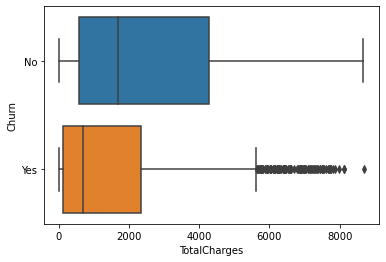

In [23]:
# Visualizing using Box PLot
sns.boxplot(x='TotalCharges', y='Churn',data=Churn)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

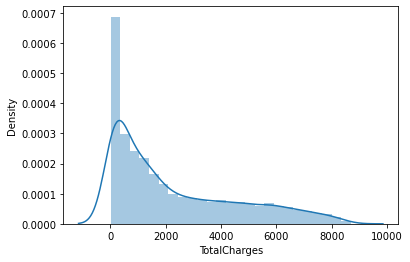

In [28]:
sns.distplot(Churn['TotalCharges'],hist=True)
# The Graph is Right Skewed

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

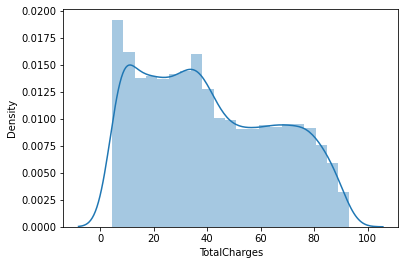

In [29]:
# Applying sqrt function to check whether it gets to Normal Distribtuion
sns.distplot(Churn['TotalCharges'].apply(np.sqrt),hist=True)

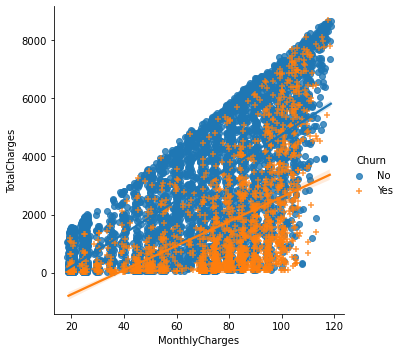

In [32]:
# Checking whether we can fill Total Charges by Monthly Charges
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=Churn,fit_reg=True,hue='Churn',markers=['o','+'])

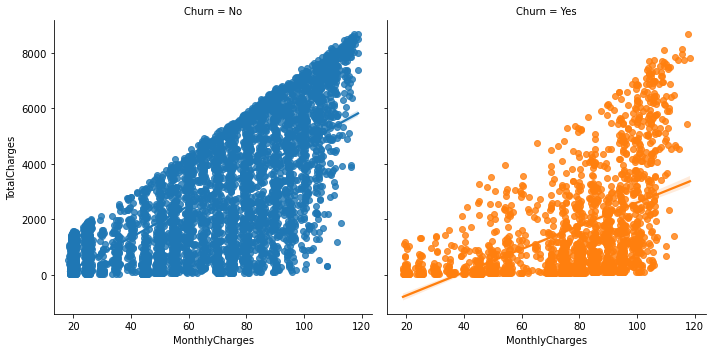

In [34]:
# Splitting the Churn ->  Yes and No
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=Churn,fit_reg=True,hue='Churn',col="Churn")

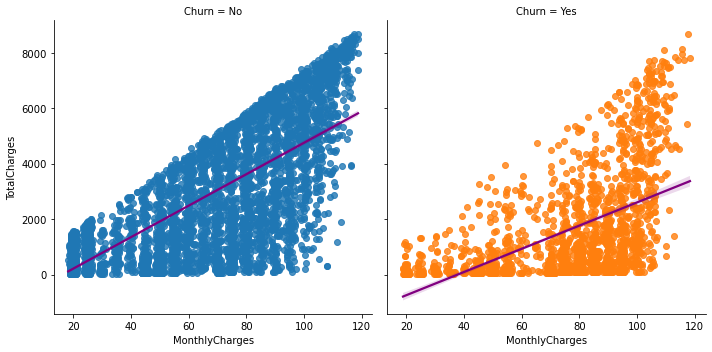

In [35]:
# Changing the color
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=Churn,fit_reg=True,hue='Churn',col='Churn',line_kws={'color':'Purple'})

In [36]:
Churn[['TotalCharges','MonthlyCharges']].corr()
# There is some good correlation between them

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.650964
MonthlyCharges,0.650964,1.000000


In [37]:
Churn[Churn['Churn']=='No'][['TotalCharges','MonthlyCharges']].corr()
# Correaltion gets better when churn = No

,TotalCharges,MonthlyCharges
TotalCharges,1.00000,0.75739
MonthlyCharges,0.75739,1.00000


In [40]:
# Creating another dataframe with Churn =No and 
Churn_No= Churn[(Churn['Churn']=='No') & (Churn['TotalCharges'].isna()==False)]

In [43]:
Churn_No.shape

(5147, 10)

In [44]:
Churn_No.isna().any()

customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [45]:
from scipy import stats
slope,intercept,r_value,p_value,std_err=stats.linregress(Churn_No['MonthlyCharges'],Churn_No['TotalCharges'])

In [47]:
print(slope)
print(intercept)
print(r_value)
print(p_value)
print(std_err)
print(r_value**2)


56.73637552696061
-922.8160085118088
0.7573902887184031
0.0
0.681926186783515
0.573640049444946
